<a href="https://colab.research.google.com/github/Shukals/Deep-Learning/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [4]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

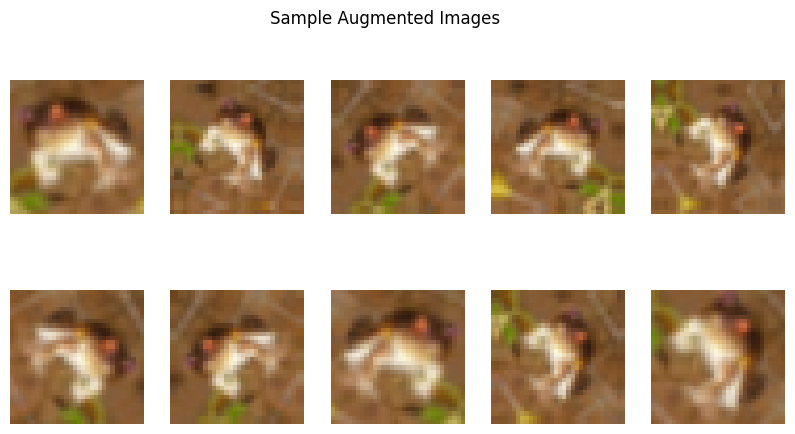

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    augmented_image = data_augmentation(X_train[:1])
    plt.subplot(2, 5, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis('off')
plt.suptitle("Sample Augmented Images")
plt.show()

In [6]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

In [7]:
model = build_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Prepare training and validation datasets
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32).map(
    lambda x, y: (data_augmentation(x), y)).prefetch(tf.data.AUTOTUNE)
test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Train the model
history = model.fit(train_data, epochs=20, validation_data=test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 60ms/step - accuracy: 0.2841 - loss: 1.9306 - val_accuracy: 0.4366 - val_loss: 1.5724
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.4433 - loss: 1.5446 - val_accuracy: 0.4971 - val_loss: 1.4263
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.4916 - loss: 1.4213 - val_accuracy: 0.5115 - val_loss: 1.3891
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.5267 - loss: 1.3375 - val_accuracy: 0.5512 - val_loss: 1.2891
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.5480 - loss: 1.2768 - val_accuracy: 0.5832 - val_loss: 1.1884
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 55ms/step - accuracy: 0.5647 - loss: 1.2371 - val_accuracy: 0.5749 - val_loss: 1.2119
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 55ms/step - accuracy: 0.5725 - loss: 1.2069 - val_accuracy: 0.5763 - val_loss: 1.2201
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.5831 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6399 - loss: 1.0596
Test Accuracy: 63.50%


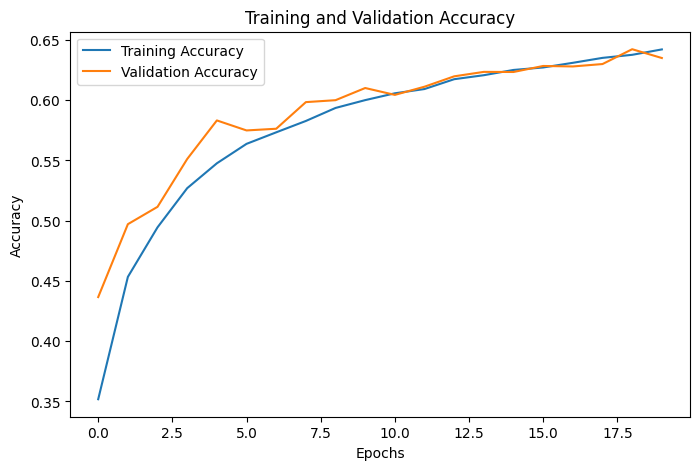

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


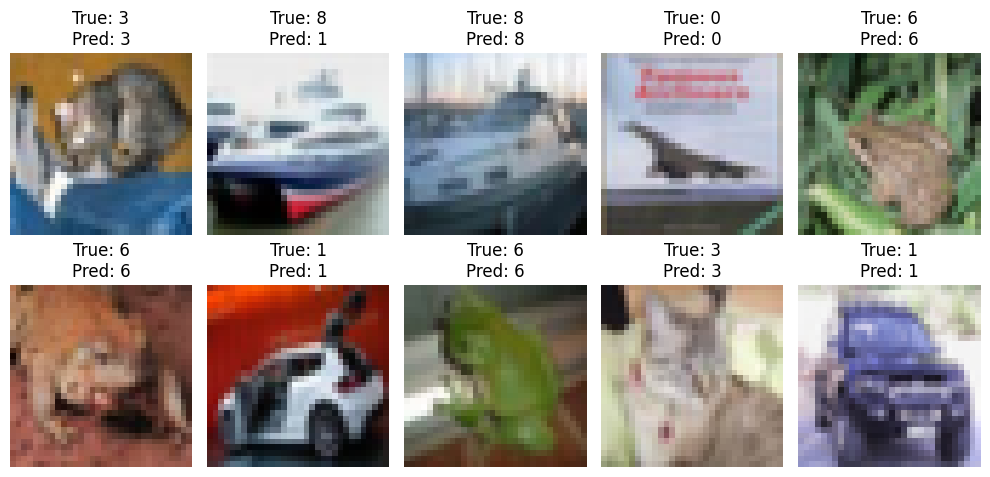

In [8]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Display predictions on test data with augmented effects
sample_images = X_test[:10]
sample_labels = np.argmax(y_test[:10], axis=1)
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {sample_labels[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()